# Προηγμένα Θέματα Αλγορίθμων


## 1η Εργαστηριακή Άσκηση


Όνομα: Γεώργιος

Επώνυμο: Γκοτζιάς

Αριθμός Μητρώου: 03119047


*Οδηγίες εκτέλεσης* 

Θα πρέπει να τρέξετε το παρόν Jupyter Notebook στον ίδιο φάκελο με τα public testcases (δηλαδή τα αρχεία
ex1_public.pickle και ex2_public.pickle) και με το script evaluate.py ώστε να μπορείτε να ελέγξετε τοπικά τις λύσεις σας.


### Άσκηση 1 (Γραμμική Παλινδρόμηση)

Στην άσκηση αυτή θα μοντελοποιήσετε το πρόβλημα της γραμμικής παλινδρόμησης (linear regression) ως ένα πρόβλημα γραμμικού προγραμματισμού. Συγκεκριμένα,
μας δίνονται $n$ σημεία $(x_i, y_i)$ τα οποία είναι μετρήσεις, με κάποιο πρόσθετο θόρυβο, από μια ευθεία $\ y = ax + b$. Ο στόχος μας είναι να βρούμε την
ευθεία που εκφράζει καλύτερα τα δεδομένα, δηλαδή τους συντελεστές $a$ και $b$
που ελαχιστοποιούν το σφάλμα:
$$
\sum_{i=1}^n |(ax_i + b) - y_i|
$$

Σε ένα κελί κειμένου περιγράψτε το γραμμικό πρόγραμμα που λύνει το πρόβλημα της γραμμικής παλινδρόμησης. Έπειτα, συμπληρώστε την συνάρτηση fit_line η οποία δέχεται ως παράμετρο την λίστα των $n$ σημείων της εισόδου και πρέπει να επιστρέφει τις παραμέτρους $a$ και $b$ της ευθείας.

*Υπόδειξη* : Η απόλυτη τιμή μιας μεταβλητής $x$ δεν είναι γραμμική συνάρτηση και δεν μπορεί να χρησιμοποιηθεί στο LP.
Μπορείτε να ορίσετε μια νέα μεταβλητή και να την "αναγκάσετε" να πάρει την τιμή |x| μέσα από γραμμικά constraints
και μέσω του optimization objective.

### Περιγραφή Γραμμικού Προγράμματος

Έστω οι μεταβλητές $a$, $b$, $δ_1$, $δ_2$, ..., $δ_n$, όπου n το πλήθος των σημείων που δίνονται.<br>
Για κάθε σημείο που δίνεται (έστω $(x_i,y_i)$)θεωρούμε τις ανισότητες $a \cdot x_i + b - y_i \leq δ_i$ και $-a \cdot x_i - b + y_i \leq δ_i$, οπότε θα ισχύει για κάθε $δ_i$: $|(a \cdot x_i + b) - y_i| \leq δ_i$. <br>
Για το γραμμικό πρόγραμμα θέλουμε να ελαχιστοποιήσουμε τη συνάρτηση $δ_1 + δ_2 + ... + δ_n$.<br>
Επειδή τα $δ_i$, $δ_j$ είναι ανεξάρτητα, αν $i \neq j$, τότε για την ελαχιστοποιήση της συνάρτησης πρέπει να ελαχιστοποιηθεί κάθε $δ_i$, οπότε θα είναι $δ_i = |(a \cdot x_i + b) - y_i| , \forall i \in \{1, 2, 3, ..., n\}$ <br>
Οι τιμές που θα αντιστοιχούν στις μεταβλητές $a$, $b$ είναι οι παράμετροι που αντιστοιχούν στη βέλτιστη ευθεία, γι' αυτό και δεν έχουν κανέναν περιορισμό, ώστε να μην αποκλειστεί καμία ευθεία.

In [1]:
from ortools.linear_solver import pywraplp

In [22]:
'''
Parameters:
  - points: a list of 2-dimensional tuples (x,y)

Returns:
  - (a,b): a tuple with the line's coefficients
'''

def fit_line(points):
  solver = pywraplp.Solver.CreateSolver('GLOP')
  # Μία μεταβλητή για την κλίση της ευθείας
  a = solver.NumVar(-solver.infinity(), solver.infinity(), 'a')
  # Μία μεταβλητή για την σταθερά της ευθείας
  b = solver.NumVar(-solver.infinity(), solver.infinity(), 'b')
  d = {}

  for i in range(len(points)):
    # Μία μεταβλητή για κάθε σημείο, για να πάρει την τιμή της απόλυτης τιμής της απόκλισης από την ευθεία
    d[i] = solver.NumVar(0, solver.infinity(), f"d_{i}")

  for i, (x, y) in enumerate(points):
    # Οι ανισότητες για την απόλυτη τιμή, όπως εξηγούνται παραπάνω 
    solver.Add(a * x  + b - y <= d[i])
    solver.Add(- a * x  - b + y <= d[i]) 

  # Η συνάρτηση που πρέπει να ελαχιστοποιηθεί, δηλαδή το άθροισμα των απόλυτων τιμών
  solver.Minimize(sum(d.values()))

  status = solver.Solve()
  if status == pywraplp.Solver.OPTIMAL:
    a_opt = a.solution_value()
    b_opt = b.solution_value()

  return a_opt, b_opt

##### Έλεγχος λύσης

In [23]:
# Τα testcases δίνονται ως ένα binary αρχείο που φορτώνεται από
# την βιβλιοθήκη pickle
import pickle

testcases = []

with open('ex1_public.pickle', 'rb') as f:
    testcases = pickle.load(f)


In [24]:
# Έχουμε στην διάθεσή μας μια λίστα από 10 testcases
print(len(testcases))

# κάθε ένα από τα οποία έχει την μορφή (points, optimal_error)
# όπου το points είναι μια λίστα με τα σημεία της ειδόδου
# και το optimal_error είναι το λάθος της βέλτιστης ευθείας πάνω στα σημεία
print(testcases[0][0], testcases[0][1])

10
[(-10.0, -73.9), (-7.777777777777778, -63.22222222222222), (-5.555555555555555, -3.394444444444442), (-3.333333333333333, -24.466666666666665), (-1.1111111111111107, 34.01111111111111), (1.1111111111111107, 31.588888888888885), (3.333333333333334, 65.16666666666667), (5.555555555555557, 77.09444444444446), (7.777777777777779, 91.42222222222223), (10.0, 113.25)] 98.08999999999999


84.84972222222223 92.39722222222215


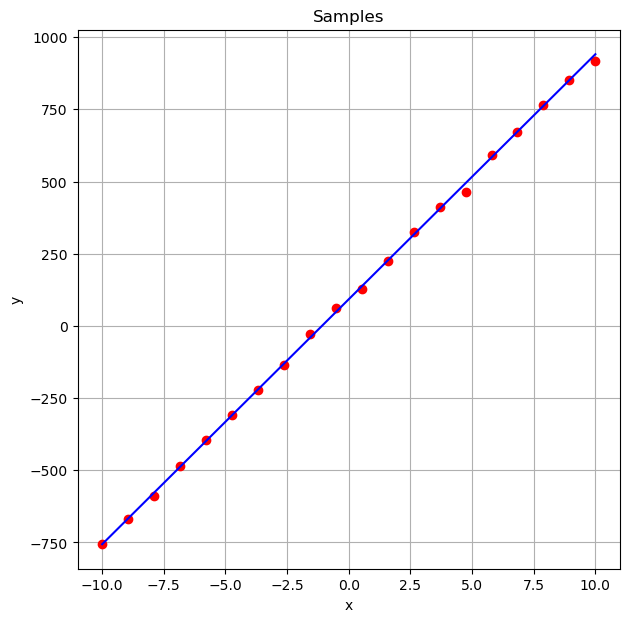

In [25]:
# μπορείτε να χρησιμοποιήσετε την συνάρτηση plot_line() για να σχεδιάσετε
# τα σημεία και την ευθεία που βρίσκει η λύση σας

import matplotlib.pyplot as plt

def plot_line(points, a, b):
    x = [z[0] for z in points]
    y_noisy = [z[1] for z in points]
    y = [a*xx+b for xx in x]

    plt.figure(figsize=(7,7))
    plt.plot(x, y_noisy, 'ro')
    plt.plot(x, y, 'b')
    plt.title('Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Για παράδειγμα, τρέχουμε το testcase 1
a, b = fit_line(testcases[1][0])
# και σχεδιάζουμε την ευθεία
print(a,b)
plot_line(testcases[1][0], a, b)

1.0 0.0


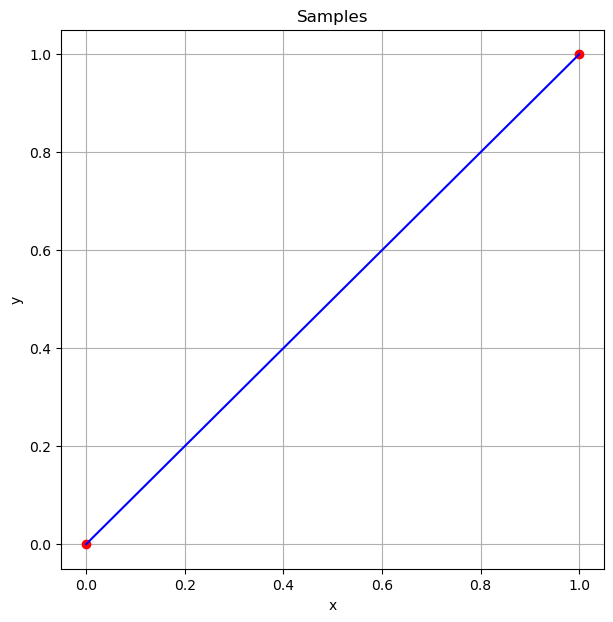

In [26]:
# Παράδειγμα, όπου δίνονται μόνο 2 σημεία
a, b = fit_line([(0,0), (1,1)])
# και σχεδιάζουμε την ευθεία
print(a,b)
plot_line([(0,0), (1,1)], a, b)
# Η οποία πρέπει να περνάει από αυτά

Για την Άσκηση 1, θα χρειαστεί να δημιουργήσετε ένα αρχείο ex1.py το οποίο θα περιέχει την συνάρτηση
fit_line που υλοποιήσατε παραπάνω και θα χρησιμοποιηθεί για τον αυτόματο έλεγχο της λύσης σας.
Προσέξτε κατά την αντιγραφή της συνάρτησης στο αρχείο να προσθέσετε και όποια imports βιβλιοθηκών πιθανώς
έχετε χρησιμοποιήσει.

Μόλις δημιουργήσετε το αρχείο ex1.py, η παρακάτω εντολή ελέγχει την λύση σας πάνω σε όλα τα public testcases.

In [27]:
!python3 evaluate.py --ex1



Testing solver for problem 1

+++ Testcase 0 OK.
+++ Testcase 1 OK.
+++ Testcase 2 OK.
+++ Testcase 3 OK.
+++ Testcase 4 OK.
+++ Testcase 5 OK.
+++ Testcase 6 OK.
+++ Testcase 7 OK.
+++ Testcase 8 OK.
+++ Testcase 9 OK.




### Άσκηση 2 (Εξυπηρέτηση δρομολογίων)

Σε μία εταιρία μεταφορών υπάρχουν καθημερινά διάφορες παραγγελίες που πρέπει να παραδοθούν από τον στόλο των φορτηγών της. Κάθε παραγγελία, λόγω ιδιαιτεροτήτων της, δεν μπορεί να παραδοθεί από όλα τα φορτηγά παρά μόνο από συγκεκριμένα, ενώ κάθε φορτηγό μπορεί να παραδόσει μόνο μία παραγγελία. 

Η είσοδος του προβλήματος είναι δύο αριθμοί $n$ και $m$, ο αριθμός των παραγγελιών και των φορτηγών αντίστοιχα, και μια λίστα με tuples $(i,j)$ τα οποία υποδηλώνουν ότι το φορτηγό $j$ μπορεί να παραδώσει την παραγγελία $i$.

Σας ζητείται να βρείτε μια ανάθεση των παραγγελιών σε φορτηγά, η οποία διευθετεί όσες το δυνατόν περισσότερες παραγγελίες, σεβόμενη τους περιορισμούς συμβατότητας και αναθέτωντας το πολύ μία παραγγελία σε κάθε φορτηγό.



Σε ένα κελί κειμένου περιγράψτε το Integer Program που λύνει το πρόβλημα και στην συνέχεια συμπληρώστε την συνάρτηση assign.

### Περιγραφή Ακέραιου Προγράμματος

Για κάθε $(i, j)$, όπου το φορτηγό $j$ μπορεί να παραδώσει την παραγγελία $i$ ορίζουμε μία μεταβλητή $w_{ij}$, όπου μπορεί να πάρει την τιμή 0 (αντιστοιχεί στον να μην επιλεγεί το $j$ να μεταφέρει την $i$) ή την τιμή 1 (αντιστοιχεί στο να επιλεγεί το $j$ να μεταφέρει την $i$). <br>
Ορίζουμε για κάθε παραγγελία $i$ την ανισότητα $\sum_{(i, j)\in compatibility} w_{ij} \leq 1$, ώστε κάθε παραγγελία να επιλέγεται για παράδοση το πολύ μία φορά. <br>
Για κάθε φορτηγό $j$ ορίζουμε την ανισότητα $\sum_{(i,j) \in compatibility} w_{ij} \leq 1$, ώστε κάθε φορτηγό να μπορεί να παραδόσει το πολύ μία παραγγελία. <br>
Για να παραδωθούν όσο το δυνατόν περισσότερες παραγγελίες πρέπει να μεγιστοποιηθεί η συνάρτηση $\sum_{(i,j) \in compatibility} w_{ij}$.<br>
Για κάθε $w_{ij}=1$ επιλέγουμε το φορτηγό $j$ να παραδώσει την παραγγελία $i$.
<br>

##### Διευκρίνιση
<small>Στον ορισμό των ανισοτήτων τα $i$ (στην πρώτη "ομάδα" ορισμών) και $j$ (στη δεύτερη "ομάδα" ορισμών) αντίστοιχα, είναι σταθερά κάθε φορά, γι' αυτό και διαφέρουν από τη συνάρτηση μεγιστοποίησης, όπου αθροίζουμε όλα τα δυνατά $(i,j)$.</small>

In [43]:
'''
Parameters:
  - n: αριθμός παραγγελιών
  - m: αριθμός διαθέσιμων φορτηγών
  - compatibility: λίστα από tuples (x,y) που υποδηλώνουν ότι
    το φορτηγό y μπορεί να παραδώσει την παραγγελία x.
    Θα ισχύει ότι 1 <= x <= n και 1 <= y <= m

Returns:
  - assignment: μια λίστα με tuples (x,y) τα οποία υποδηλώνουν ότι η παραγγελία
    x θα παραδοθεί από το φορτηγό y.

Sample input:
  n = 3
  m = 2
  compatibility = [(1,1), (2,1), (3,1), (2,2), (3,2)]

Sample output:

  [(1,1), (2,2)]

Σημείωση: υπάρχουν και άλλες λύσεις στις οποίες ταξινομούνται 2 παραγγελίες,
π.χ. [(2,1), (3,2)]. Μπορείτε να επιστρέψετε οποιαδήποτε από αυτές θέλετε.
'''
def assign(n, m, compatibility):
  solver = pywraplp.Solver.CreateSolver('SAT')
  w = {}
  for (i, j) in compatibility:
    # Ορίζουμε μία τυχαία μεταβλητή, για κάθε επιτρεπτό συνδυασμό παραγγελίας - φορτηγού
    w[(i,j)] = solver.IntVar(0, 1, f'w_{(i,j)}')

  for i in range(1, n + 1):
    # Για κάθε παραγγελία, μπορεί να επιλεγεί το πολύ 1 φορτηγό
    solver.Add(solver.Sum(w[(i, j)] for (k, j) in w.keys() if k==i) <= 1)

  for j in range(1, m +1):
    # Κάθε φορτηγό, μπορεί να παραφώσει το πολύ μία παραγγελία
    solver.Add(solver.Sum(w[(i, j)] for (i, k) in w.keys() if k==j) <= 1)
  
  solver.Maximize(sum(w.values()))
  status = solver.Solve()

  result = []

  if status == pywraplp.Solver.OPTIMAL:
    result = [i for i in w if w[i].solution_value() > 0]
  return result


In [44]:
# Τρέχουμε το sample testcase
assign(3, 2, [(1,1), (2, 1), (3, 1), (2,2), (3,2)])

[(1, 1), (3, 2)]

Αντίστοιχα με την Άσκηση 1, δημιουργήστε ένα αρχείο ex2.py και μεταφέρετε εκεί την συνάρτηση assign
μαζί με πιθανά imports βιβλιοθηκών. Χρησιμοποιείστε την επόμενη εντολή για να ελέγξετε την λύση σας.

In [45]:
!python3 evaluate.py --ex2



Testing solver for problem 2

+++ Testcase 0 OK.
+++ Testcase 1 OK.
+++ Testcase 2 OK.
+++ Testcase 3 OK.
+++ Testcase 4 OK.
+++ Testcase 5 OK.
+++ Testcase 6 OK.
+++ Testcase 7 OK.
+++ Testcase 8 OK.
+++ Testcase 9 OK.




## Παραδοτέα

Για την Άσκηση 1
 * Σε ένα κελί κειμένου περιγράψτε το Linear Program που λύνει την άσκηση
 * Υλοποιήστε το linear program χρησιμοποιώντας τα or-tools στην συνάρτηση fit_line
 * Τρέξτε διάφορα sanity checks. Για παράδειγμα αν δώσετε στην λύση σας μόνο δύο σημεία, τότε το αποτέλεσμα θα πρέπει να είναι η ευθεία που περνά από αυτά τα σημεία και το συνολικό σφάλμα θα είναι 0. Μπορείτε ακόμα να σχεδιάσετε την λύση σας για διάφορα testcases για να δείτε αν όντως κάνει fit στα δεδομένα.
 
 * Μεταφέρετε την fit_line στο αρχείο ex1.py και τρέξτε το evalute.py με παράμετρο --ex1 για να δείτε ότι περνάτε επιτυχώς όλα τα public testcases

Για την Άσκηση 2
 * Σε ένα κελί κειμένου περιγράψτε το Integer Program που λύνει την άσκηση
 * Υλοποιήστε το integer program χρησιμοποιώντας τα or-tools στην συνάρτηση assign
 * Τρέξτε το sample testcase.
 * Μεταφέρετε την assign στο αρχείο ex2.py και τρέξτε το evalute.py με παράμετρο --ex2 για να δείτε ότι περνάτε επιτυχώς όλα τα public testcases

Παραδοτέα

 * Αποθηκεύστε το παρόν notebook σαν html αρχείο (File --> Download as --> HTML) και φροντίστε να έχετε τρέξει όλα τα κελιά ώστε να φαίνονται τα αποτελέσματα.
 * Θα παραδόσετε ένα αρχείο .zip που θα περιέχει το notebook σαν html αρχείο και τα δύο python scripts που δημιουργήσατε (ex1.py, ex2.py)